In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import scipy.stats
import scipy.optimize
from datetime import datetime

import uproot

from ipywidgets import IntProgress
from IPython.display import display

import multigauss as mg
import pylandau

matplotlib.rcParams['figure.figsize'] = [12,8]
matplotlib.rcParams['axes.labelsize'] = 'x-large'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df56 = pd.read_pickle('test_data/mip_sps_ch32.pkl')
dft = df56.loc[df56.channel == 32]

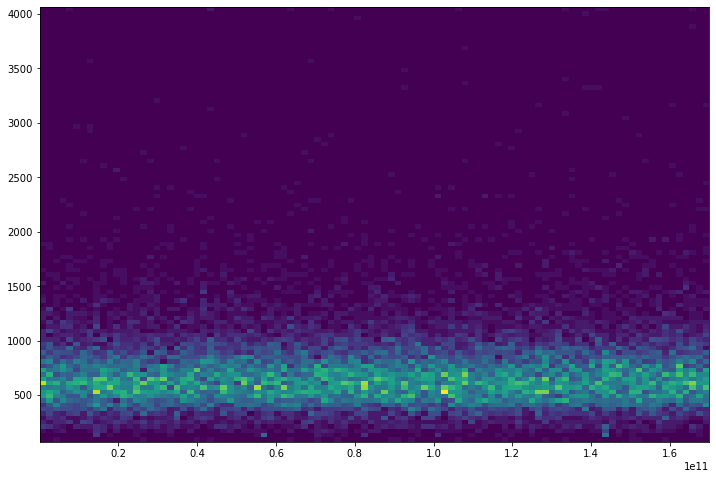

In [8]:
# histogram HG vs. timestamp for crash detection
_ = plt.hist2d(dft.t_stamp, dft.HG, bins = 100)
#plt.yscale('log')

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 7.50342403e+05  0.00000000e+00  5.00000000e+00  4.41668620e+01
 -2.69482427e-03  4.18441292e+00  1.21331882e+01  7.74087983e-02
  7.50295106e+05]


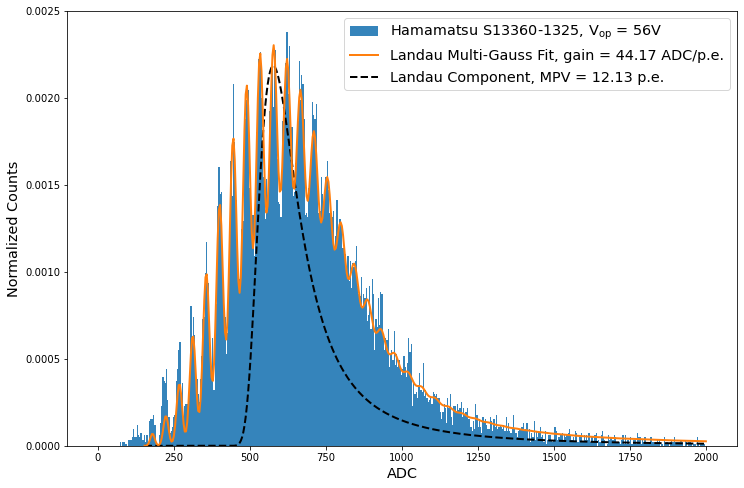

In [54]:
 content, bins, _  = plt.hist(dft.HG, bins = 500, range = (0, 2000), density = True, label = 'Hamamatsu S13360-1325, V${}_\mathrm{op}$ = 56V', alpha = 0.9)
 centers = (bins[:-1] + bins[1:])/2
 
#plt.plot(centers, mg.sps_landau_poisson(centers, ped_x = 50, ped_a = 0.00, gain = 45, width_base = 4, width_scale = 4, landau_mpv=12, landau_sigma= 0.08, ped_offset = 15, output_single_peaks = False))

mask = (centers > 150)

r, c = scipy.optimize.curve_fit(mg.sps_landau_poisson, centers[mask], content[mask], p0=(50, 0.000, 5, 45, 4, 4, 12, 0.08, 15))

plt.plot(centers[mask], mg.sps_landau_poisson(centers, *r)[mask], lw = 2, label=f'Landau Multi-Gauss Fit, gain = {r[3]:.2f} ADC/p.e.', color = 'C1')

landau_mpv = r[6]
landau_sigma = r[7]

landau = pylandau.landau_pdf((centers-50)/r[3] , landau_mpv, landau_sigma*landau_mpv)
plt.plot(centers[mask], landau[mask]/44/2, lw = 2, label=f'Landau Component, MPV = {r[6]:.2f} p.e.', color = 'black', ls = '--', zorder = 1)



plt.ylabel('Normalized Counts')
plt.xlabel('ADC')

plt.legend(fontsize='x-large')

plt.savefig('sps_landau_poisson_fit.pdf')

print(r)


 